# 🌳 Classificação de Tumores com Decision Tree

## 🩺 Sobre o Dataset

Este projeto utiliza o famoso **Breast Cancer Wisconsin Dataset**, disponível na biblioteca `sklearn.datasets`. O objetivo é prever se um tumor é **maligno** ou **benigno** com base em características extraídas de imagens digitalizadas de nódulos mamários.

- **Variável-alvo (`target`)**:
  - `0`: Tumor **Maligno**
  - `1`: Tumor **Benigno**

- **Total de amostras**: 569
- **Total de variáveis preditoras**: 30 (ex: textura, área, concavidade, simetria)

---

## 🚀 Pipeline do Projeto

| Etapa | Descrição |
|-------|-----------|
| 📥 1. Carregamento | Importação e visualização do dataset |
| 🔍 2. Análise Inicial | `head()`, `info()` e `describe()` |
| ✂️ 3. Split dos dados | Separação entre treino (80%) e teste (20%) |
| 🎯 4. Escolha do `max_depth` | Busca da profundidade ideal via cross-validation |
| 🧠 5. Treinamento | Treino com `DecisionTreeClassifier` |
| 📈 6. Avaliação | Métricas completas e visualizações |
| 🌳 7. Visualização da árvore | Interpretação das regras do modelo |

---

## 📊 Régua Visual de Avaliação de Métricas de Classificação

| Métrica     | O que mede                                               | Quando usar                                                                 | Interpretação (Régua de Qualidade) |
|-------------|----------------------------------------------------------|------------------------------------------------------------------------------|------------------------------------|
| **🎯 Acurácia** | Proporção total de acertos (positivos e negativos)     | Quando as classes estão **bem balanceadas**                                | ✅ > 0.85 (excelente)<br>🟡 0.75–0.85 (ok)<br>🔴 < 0.75 (baixo) |
| **🎯 Precision** | % de positivos previstos que são realmente positivos  | Quando **falsos positivos são mais graves** (ex: crédito, prisões)         | ✅ > 0.80 (alta confiança)<br>🟡 0.65–0.80 (cuidado)<br>🔴 < 0.65 (alerta de ruído) |
| **🎯 Recall** | % de positivos reais identificados corretamente         | Quando **falsos negativos são mais graves** (ex: doenças, fraudes)         | ✅ > 0.80 (ótima cobertura)<br>🟡 0.65–0.80 (aceitável)<br>🔴 < 0.65 (perigo de omissão) |
| **🎯 F1-Score** | Equilíbrio entre Precision e Recall                    | Quando FP e FN têm **peso similar** ou dados estão desbalanceados          | ✅ > 0.80 (robusto)<br>🟡 0.70–0.80 (ok)<br>🔴 < 0.70 (desequilíbrio crítico) |
| **📈 AUC (ROC)** | Capacidade geral de separação das classes             | Para avaliar **modelo em vários thresholds** (independe de corte)          | ✅ > 0.90 (excelente)<br>🟡 0.80–0.90 (bom)<br>🔴 < 0.80 (fraco ou aleatório) |
| **📈 GINI**    | Variante do AUC: `2*AUC - 1`                            | Muito usado em **score de crédito, churn, risco**                          | ✅ > 0.60 (ótimo)<br>🟡 0.40–0.60 (moderado)<br>🔴 < 0.40 (baixa separação) |
| **📉 KS**      | Distância entre distribuições acumuladas               | Ideal para **modelos de crédito, retenção, churn**                         | ✅ > 0.60 (separação excelente)<br>🟡 0.40–0.60 (adequado)<br>🟠 0.20–0.40 (fraco)<br>🔴 < 0.20 (quase aleatório) |

---

## 🧠 Dicas práticas para leitura

- **Use Recall** para detectar o máximo de casos malignos (evitar omissões).
- **Use Precision** quando quiser evitar falsos alarmes.
- **Use F1-score** quando precisar equilibrar ambos.
- **AUC, GINI e KS** avaliam a **qualidade da separação dos scores preditivos**.
- **Acurácia isolada pode enganar** → combine com outras métricas!

📌 *Para produção, é recomendado manter F1 > 0.75 e AUC > 0.85.*

---

## 📘 Como Ler os Resultados

- **Alta acurácia ≠ bom modelo** → considere também Recall, Precision e AUC.
- **Baixo Recall** → o modelo **não está detectando casos positivos suficientes** (riscos clínicos).
- **Baixa Precision** → o modelo está **gerando muitos alarmes falsos**.
- **F1-score** traz uma visão mais equilibrada.
- **AUC / GINI / KS** indicam a **eficácia do score preditivo**.
- **Árvore desenhada** permite **interpretabilidade total** da decisão.

---

## 📷 Visualizações Geradas

- 🔵 Matriz de Confusão
- 🟠 Curva ROC (com AUC)
- 🟣 Curva Precision-Recall
- 🌳 Visualização da Árvore de Decisão
- 📈 Gráfico da melhor profundidade (`max_depth`)
- 📉 KS e GINI

---

## 📉 Validação Cruzada

A profundidade ideal da árvore (`max_depth`) é escolhida com base na **validação cruzada (cross-validation)** de 5 folds, garantindo robustez no treino e evitando overfitting.

---

## 🛠️ Requisitos

```bash
pip install numpy pandas scikit-learn seaborn matplotlib


📌 Primeiras 5 linhas do dataset Breast Cancer:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture

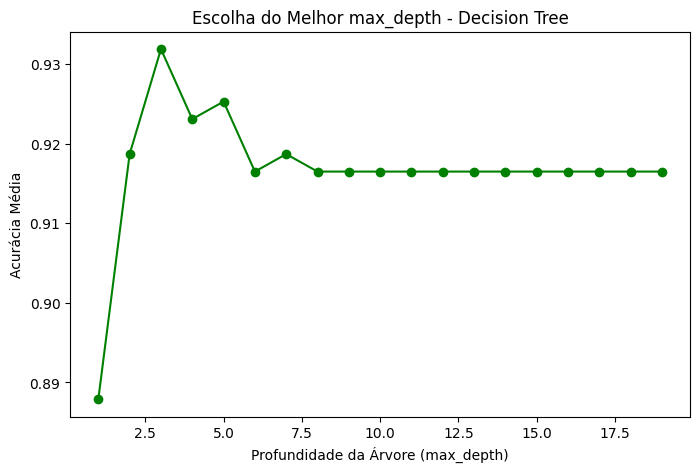

🌟 Melhor max_depth encontrado: 3 com acurácia média de 0.9319

✅ Acurácia no Treino: 0.98
✅ Acurácia no Teste: 0.95
📉 Validação Cruzada (Treino): 0.93

📊 Relatório de Classificação:
              precision    recall  f1-score   support

   malignant       0.95      0.91      0.93        43
      benign       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



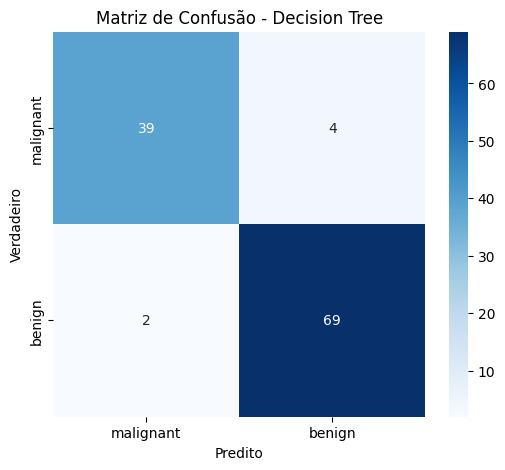

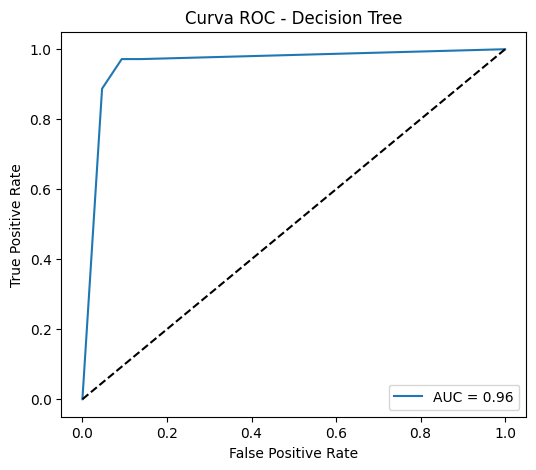

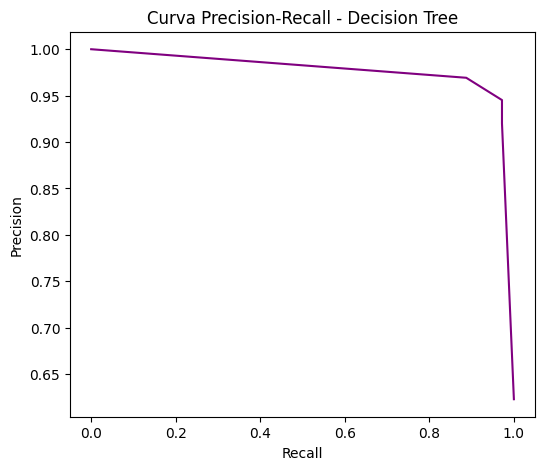

KS: 0.88
GINI: 0.91


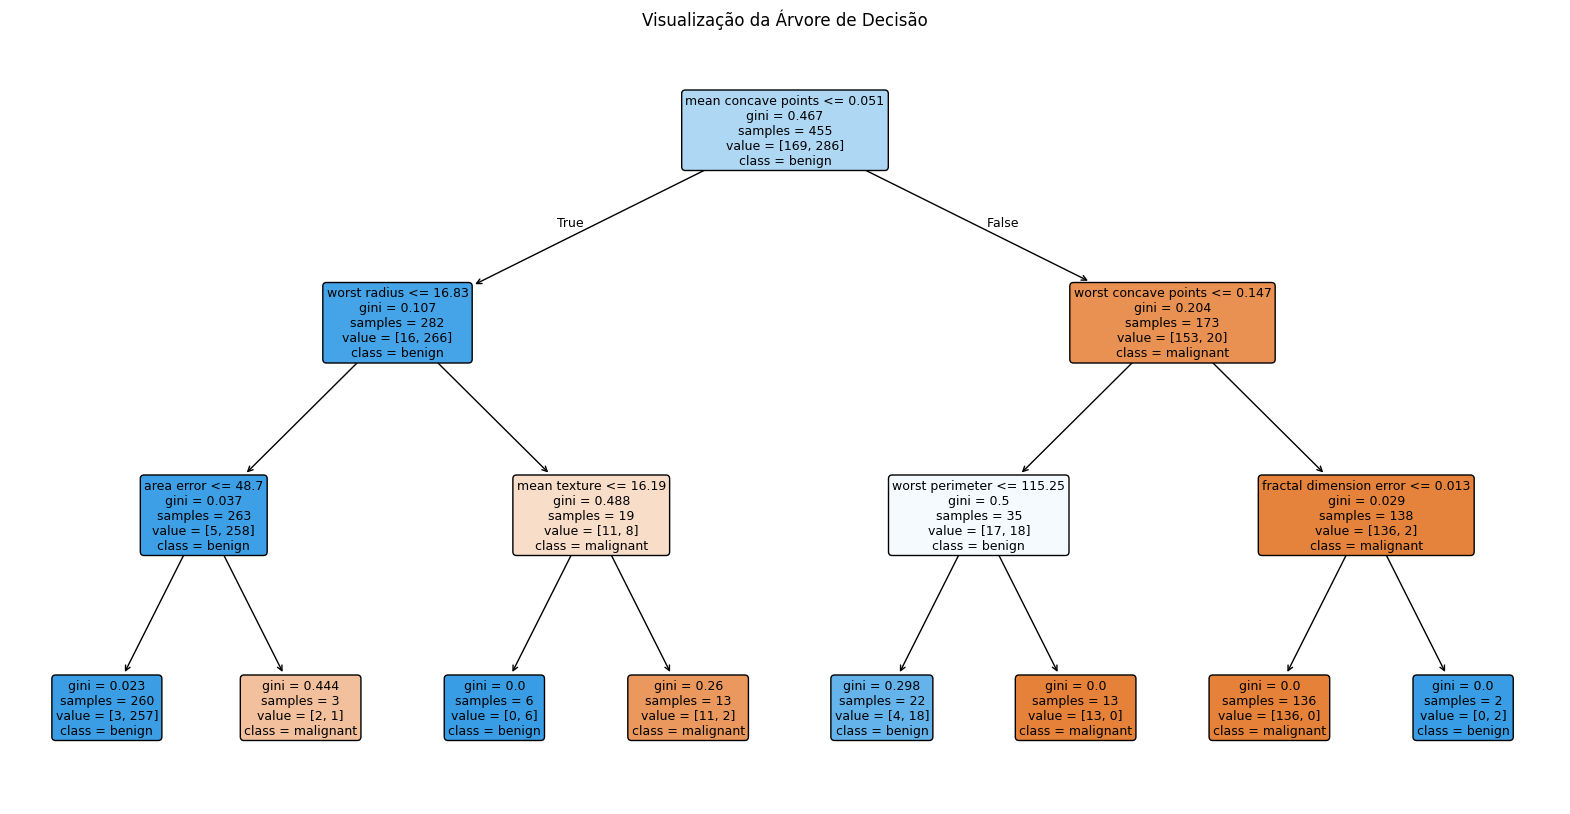

In [5]:
# 📦 Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_recall_curve
)
from scipy.stats import ks_2samp

# 🔹 Função para carregar o dataset
def carregar_dataset():
    cancer = load_breast_cancer()
    df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
    df['target'] = cancer.target

    print("📌 Primeiras 5 linhas do dataset Breast Cancer:")
    print(df.head(), "\n")
    print("📌 Informações do dataset:")
    print(df.info(), "\n")
    print("📌 Estatísticas descritivas:")
    print(df.describe(), "\n")

    X = cancer.data
    y = cancer.target
    return X, y, cancer.target_names

# 🔹 Função para encontrar a melhor profundidade da árvore
def encontrar_melhor_max_depth(X_train, y_train):
    depths = list(range(1, 20))
    scores = []

    for d in depths:
        model = DecisionTreeClassifier(max_depth=d, random_state=42)
        score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
        scores.append(score)

    melhor_d = depths[np.argmax(scores)]

    plt.figure(figsize=(8, 5))
    plt.plot(depths, scores, marker='o', color='green')
    plt.xlabel("Profundidade da Árvore (max_depth)")
    plt.ylabel("Acurácia Média")
    plt.title("Escolha do Melhor max_depth - Decision Tree")
    plt.show()

    print(f"🌟 Melhor max_depth encontrado: {melhor_d} com acurácia média de {max(scores):.4f}\n")
    return melhor_d

# 🔹 Função para treinar, avaliar e validar o modelo Decision Tree
def treinar_avaliar_tree(X_train, X_test, y_train, y_test, target_names, melhor_d):
    modelo = DecisionTreeClassifier(max_depth=melhor_d, random_state=42)
    modelo.fit(X_train, y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred)

    print(f"✅ Acurácia no Treino: {acc_train:.2f}")
    print(f"✅ Acurácia no Teste: {acc_test:.2f}")

    # ✅ Validação cruzada no conjunto de treino
    cv_score = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy').mean()
    print(f"📉 Validação Cruzada (Treino): {cv_score:.2f}\n")

    if acc_train - acc_test > 0.10:
        print("⚠️ Possível Overfitting detectado!")

    print("📊 Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.title("Matriz de Confusão - Decision Tree")
    plt.show()

    # Curva ROC e AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Curva ROC - Decision Tree")
    plt.legend()
    plt.show()

    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color='purple')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Curva Precision-Recall - Decision Tree")
    plt.show()

    # KS e GINI
    ks = ks_2samp(y_prob[y_test == 1], y_prob[y_test == 0]).statistic
    gini = 2 * auc - 1
    print(f"KS: {ks:.2f}")
    print(f"GINI: {gini:.2f}")

    # Visualização da Árvore
    plt.figure(figsize=(20, 10))
    plot_tree(modelo, filled=True, feature_names=load_breast_cancer().feature_names,
              class_names=target_names, rounded=True, fontsize=9)
    plt.title("Visualização da Árvore de Decisão")
    plt.show()

# 🚀 Execução principal
if __name__ == "__main__":
    X, y, target_names = carregar_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    melhor_d = encontrar_melhor_max_depth(X_train, y_train)
    treinar_avaliar_tree(X_train, X_test, y_train, y_test, target_names, melhor_d)
